# Importamos las librerias y descargamos el archivo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA
import umap

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Generación de dataframe a partir del CSV
df = pd.read_csv('Crop_recommendation.csv')

# Visualización de las primeras 5 filas para conocer la estructura de los datos
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


# Analisis de los atributos del conjunto de datos 

A continuacion analizamos distribuciones, valores, outliers, tipos de datos, etc. y elegimos el método de estandarización que consideramos mas adecuado.

In [3]:
# Obtenemos información general sobre el DataFrame, incluyendo tipos de datos y conteo de valores no nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


Podemos observar que no que no tenemos datos nulos y que los datos pueden ser, enteros, flotantes y objetos. Analizamos un poco más el tipo de datos, unidad de medida y que representan en el contexto del dataset.

El dataset que estamos analizandoesta relacionada con la agricultura, incluye información sobre diferentes variables que pueden afectar al crecimiento de las plantas.

In [4]:
df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


- N (Nitrogeno): Esta columna representa la cantidad de nitrógeno en el suelo, media en %.
- P (Fósforo): Esta columna indica la cantidad de fósforo en el suelo, también medida en %.
- K (Potasio): Aquí se muestra la cantidad de potasio en el suelo, medida en %.
- Temperatura: Esta columna indica la temperatura ambiente en el entorno de cultivo de las plantas. Que parece estar medida en grados centígrados.
- Humedad: Representa el nivel de humedad ambiental en el área de cultivo. Media en %.
- pH: Indica el nivel de acidez o alcalinidad del suelo. 
- Lluvia (Rainfall): Esta columna muestra la cantidad de precipitación que recibe el área de cultivo. 
- Etiqueta (Label): Esta columna clasifica el tipo de cultivo o planta que se está cultivando en el área descrita por las otras variables. A continuación podemos ver todos los valores que asume esta variable.

In [5]:
label = df['label'].unique()
print(label)
print("Cantidad de cultivos: ", len(list(label)))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Cantidad de cultivos:  22


In [6]:
# Vamos a codificar esta columna
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
# Veamos el resultado
labels_enc = df['label'].unique()
print("Códigos para identificar a los cultivos: ")
print('Cultivo', 'Código')
for cu, co in zip(label, labels_enc):
    print('{:<10} {:<5}'.format(cu, co))


Códigos para identificar a los cultivos: 
Cultivo Código
rice       20   
maize      11   
chickpea   3    
kidneybeans 9    
pigeonpeas 18   
mothbeans  13   
mungbean   14   
blackgram  2    
lentil     10   
pomegranate 19   
banana     1    
mango      12   
grapes     7    
watermelon 21   
muskmelon  15   
apple      0    
orange     16   
papaya     17   
coconut    4    
cotton     6    
jute       8    
coffee     5    


In [7]:
# Resumen estadístico de los datos numéricos
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall        label  
count  2200.000000  2200.000000  2200.000000  
mean      6.469480   103.463655    10.500000  
std       0.773938    54.958389     6.345731  
min       3.504752    20.211267     0.000000  
25%       5.971693    64.551686     5.000000  
50%       6.425045    94.867624    10.500000  
75% 

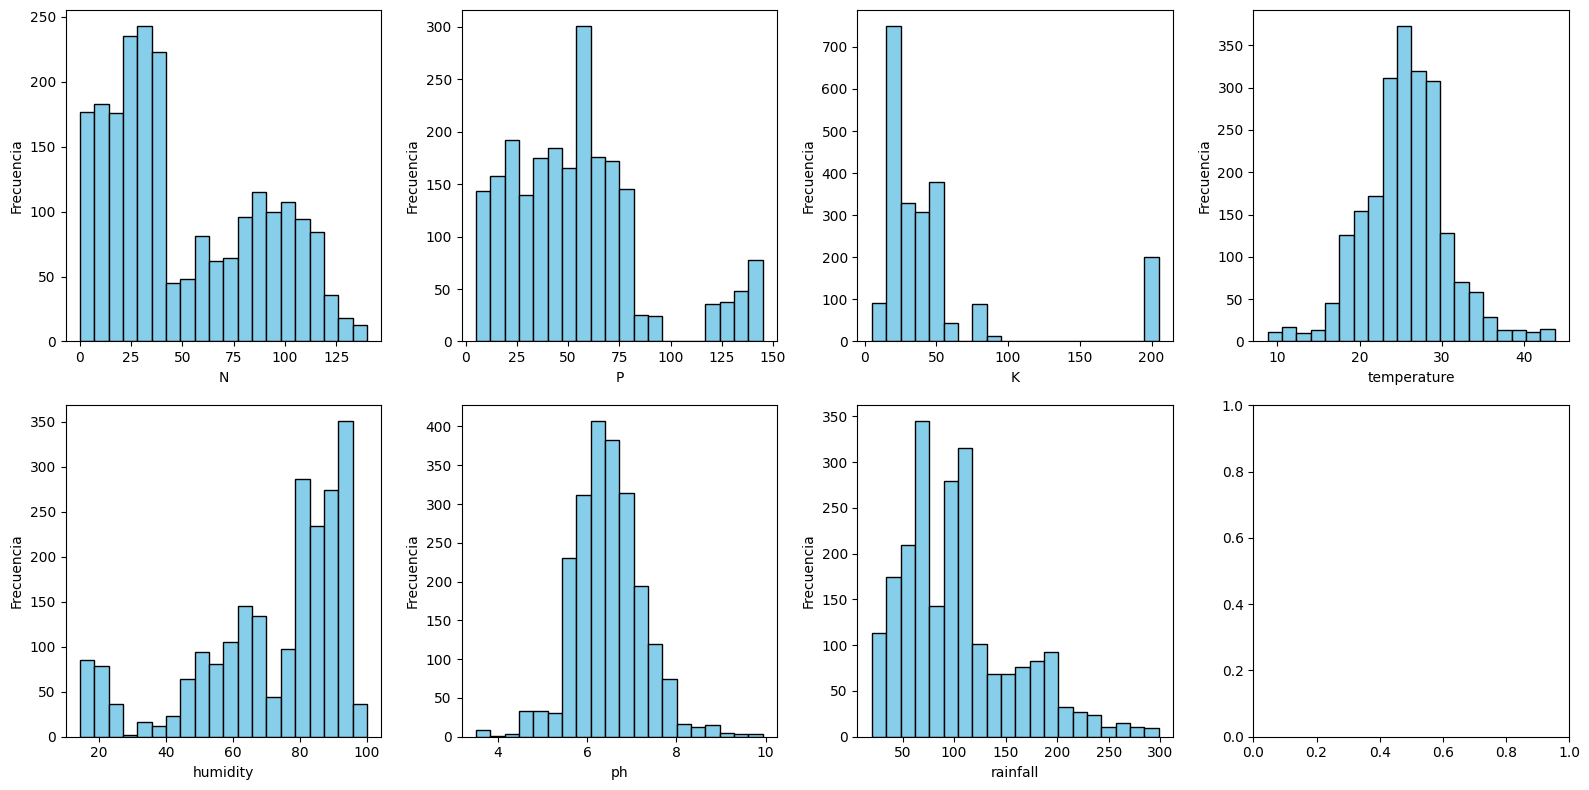

In [8]:
# Realizamos un histograma de las variables numéricas
variables_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for i, variable in enumerate(variables_numericas):
    fila = i // 4
    columna = i % 4
    axs[fila, columna].hist(df[variable], bins=20, color='skyblue', edgecolor='black')
    axs[fila, columna].set_xlabel(variable)
    axs[fila, columna].set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()

In [9]:
# Visualizar distribuciones de variables numéricas
# sns.pairplot(df)
# plt.show()

## Eliminación de outliers

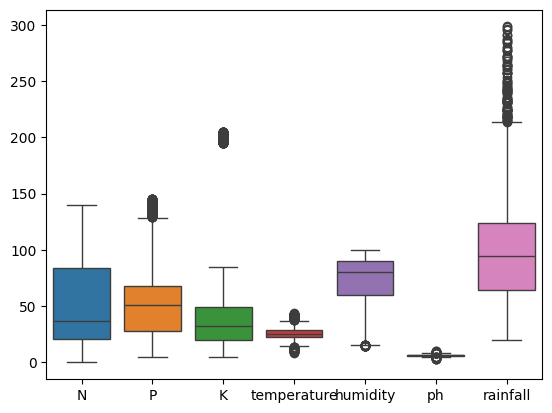

In [10]:
# Identificar valores atípicos (outliers) en las variables numéricas
sns.boxplot(data=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
plt.show()

Longitud del dataframe antes de filtrar: 2200
Longitud del dataframe después de filtrar: 1941


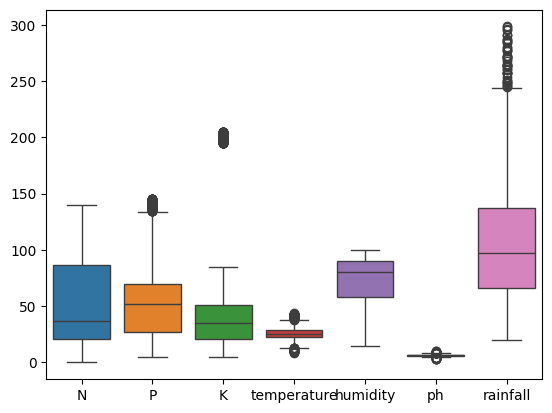

In [11]:
# Eliminamos de outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# Rango intercuartílico (IQR)
IQR = Q3 - Q1
# Definimos los límites superior e inferior para identificar outliers
lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

print("Longitud del dataframe antes de filtrar: "+str(df.shape[0]))
df = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print("Longitud del dataframe después de filtrar: "+str(df.shape[0]))


# Chequeamos en el gráfico
sns.boxplot(data=df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
plt.show()

# Vemos que los datos tienen mucha varianza, así que sacar muchos outliers significa quedarse
# con muy pocos registros. Usamos un factor de 0.3 para quedarnos con una cantidad
# significativa de registros.

In [12]:
# Aplicamos Min-Max scaling para llevar las características a un rango común
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
data_scaled_minmax = pd.DataFrame(scaled_data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
print(data_scaled_minmax.describe().round(4))

# También hacemos Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
data_scaled_z = pd.DataFrame(scaled_data, columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
print(data_scaled_z.describe().round(4))

               N          P          K  temperature   humidity         ph  \
count  1941.0000  1941.0000  1941.0000    1941.0000  1941.0000  1941.0000   
mean      0.3664     0.3503     0.2311       0.4803     0.6632     0.4593   
std       0.2696     0.2469     0.2652       0.1526     0.2703     0.1260   
min       0.0000     0.0000     0.0000       0.0000     0.0000     0.0000   
25%       0.1500     0.1571     0.0800       0.3908     0.5132     0.3780   
50%       0.2643     0.3357     0.1500       0.4797     0.7752     0.4495   
75%       0.6214     0.4643     0.2300       0.5695     0.8857     0.5330   
max       1.0000     1.0000     1.0000       1.0000     1.0000     1.0000   

        rainfall  
count  1941.0000  
mean      0.3097  
std       0.2050  
min       0.0000  
25%       0.1638  
50%       0.2773  
75%       0.4204  
max       1.0000  
               N          P          K  temperature   humidity         ph  \
count  1941.0000  1941.0000  1941.0000    1941.0000  1941.

# Veamos la matriz de correlación #

In [13]:
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20


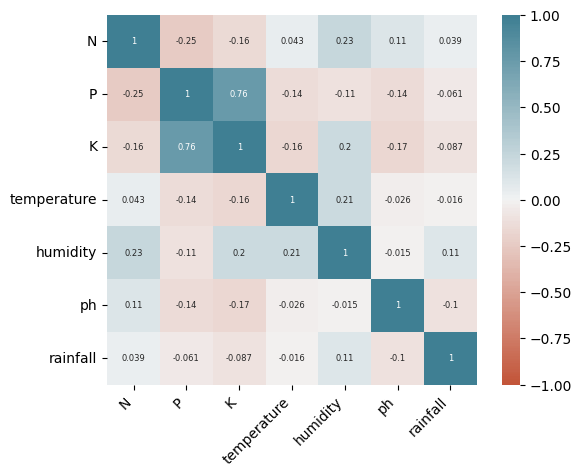

In [14]:
corr = df.drop(['label'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Vemos alta correlación entre K y P, y también una correlación considerable entre P y N, humidity y N, y temperature y humidity.

# PCA

In [15]:
df_sub = data_scaled_z
df_std = (df_sub-df_sub.mean())/df_sub.std()

pca = PCA(n_components=df_sub.shape[1])

pcaFeatures = pca.fit_transform(df_std)

# PC dataframe
pca_df = pd.DataFrame(
    data=pcaFeatures,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_df['label'] = df['label']

print(pca_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.653431 -0.733009  0.736301 -1.873223  0.145824 -0.144208 -0.016514   
1    -0.553395 -0.678470  0.620599 -2.029216  0.946312 -0.503271  0.218954   
2    -0.698182 -0.567281  0.631789 -2.100523  2.301764 -0.386862  0.046664   
3    -1.097153 -0.933963  1.032671 -1.343365  1.299625 -0.544838 -0.304671   
4    -0.935484 -0.529322  0.671022 -2.625356  1.706840 -0.255439 -0.115576   
...        ...       ...       ...       ...       ...       ...       ...   
1936 -1.298889 -0.537066  0.296057 -1.053431  0.121280 -1.084898 -0.309654   
1937 -1.367300 -0.090146  0.462072 -0.253135 -0.867037 -0.793031 -0.640828   
1938 -1.207413 -0.558037  0.467988 -1.397184 -0.527195 -0.936742 -0.219428   
1939 -1.247062  0.071413 -0.254677 -0.799028 -0.533771 -1.312681 -0.479870   
1940 -1.388376  0.100134 -0.021194 -1.147997 -0.378218 -0.605568 -0.552480   

      label  
0      20.0  
1      20.0  
2      20.0  
3      

En esa tabla vemos la proyección de cada cultivo en cada una de las nuevas variables.

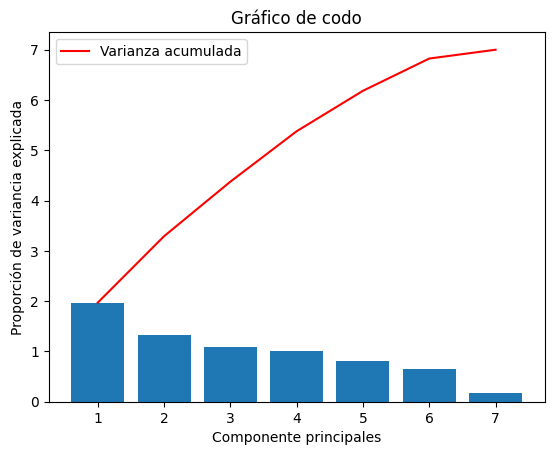

In [16]:
# Aquí vemos las varianzas explicadas por cada componente principal encontrado durante el análisis.
# (la cantidad de varianza en los datos originalmente explicada por esa componente)
pca.explained_variance_

# Estos valores representan las magnitudes de los componentes principales en las direcciones de máxima variabilidad de los datos originales. 
pca.singular_values_

# Bar plot de la variable explained_variance (gráfico del codo)
plt.bar(
    range(1,len(pca.explained_variance_)+1), pca.explained_variance_)
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Varianza acumulada')
 
plt.legend(loc='upper left')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.title('Gráfico de codo')
 
plt.show()

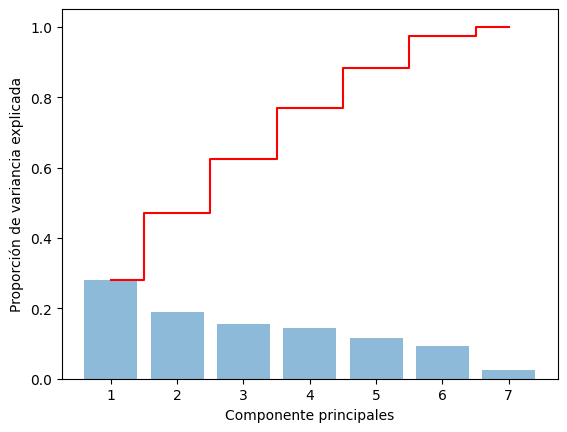

In [17]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

Vemos que la curva no se aplana muy rápidamente, pero que con 4 o 5 variables podría tener bastante explicabilidad de la varianza de los datos en mi dataset original.

**Criterios de selección:**
* Proporción de variancia acumulada (~75% -80%)​
* Criterio de Kaiser (eigenvalues > 1)​
* Gráfico del codo (Scree)

In [18]:
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.969865,0.281409,0.281409
1,1.320789,0.188684,0.470093
2,1.084929,0.154990,0.625083
3,1.003322,0.143332,0.768415
4,0.804544,0.114935,0.883350
5,0.641314,0.091616,0.974966
6,0.175237,0.025034,1.000000


# Matriz de correlación de las componentes seleccionadas # 

Vemos como la ortogonalidad de las componentes hace que su co-varianza sea practicamente cero.

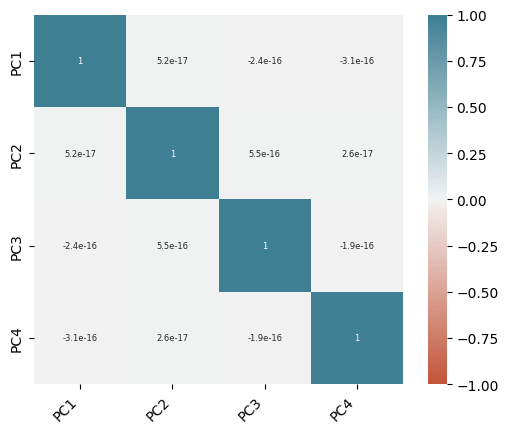

In [19]:
corr = pca_df[['PC1', 'PC2', 'PC3', "PC4"]].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

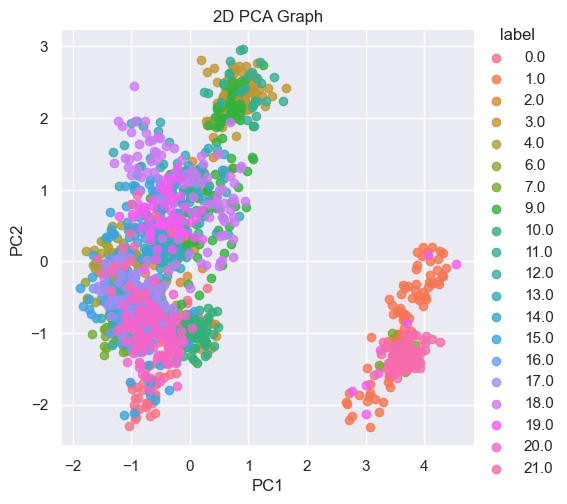

In [20]:
sns.set()
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='label', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

# ISOMAP #

2D

In [21]:
from sklearn.manifold import Isomap
import plotly.express as px

# Crear una instancia de Isomap con 2 componentes para reducción a 2D
isomap_df = Isomap(n_neighbors=4, n_components=2)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

# Crear el gráfico de dispersión en 2D con Plotly Express
fig = px.scatter(
    x=projections_isomap[:, 0], y=projections_isomap[:, 1],
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr

3D

In [22]:
isomap_df = Isomap(n_neighbors=5, n_components=3)
isomap_df.fit(df_std)
projections_isomap = isomap_df.transform(df_std)

fig = px.scatter_3d(
    projections_isomap, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning:

The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\franc\AppData\Local\Programs\Python\Py

Experimentamos con el hiperparámetro de los vecinos, considerando que con un número menor que 4 obtenemos una nube de datos amorfa, y con algo mayor que 5 los datos empiezan a estructurarse como outliers sobre ciertos segmentos de recta.

Con 4 vecinos, observamos una estructura "de anillo", donde los datos de menor label (azules y violetas) se agrupan en un extremo del anillo, y los "naranja", "amarillo" y violeta claro, en el otro.

# t-SNE #

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=0, perplexity=5)
projections_tsne = tsne.fit_transform(df_std, )

fig = px.scatter_3d(
    projections_tsne, x=0, y=1, z=2,
    color=df['label'], labels={'color': 'label'}
)
fig.update_traces(marker_size=8)
fig.show()

# UMAP #

In [29]:
from umap import UMAP
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(df_std)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig_2d.show()

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [30]:
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0, n_neighbors=4)
proj_2d = umap_2d.fit_transform(df_std)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig_2d.show()

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [31]:
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0, n_neighbors=4, metric="euclidean")
proj_2d = umap_2d.fit_transform(df_std)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig_2d.show()

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [28]:
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0, n_neighbors=4, metric="mahalanobis")
proj_2d = umap_2d.fit_transform(df_std)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['label'], labels={'color': 'label'}
)
fig_2d.show()

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:576: RuntimeWarning:

overflow encountered in cast



Experimentamos con los hiperparámetros disponibles hasta llegar a una buena representación de los datos, donde claramente se ven aglomeraciones relacionadas al label del cultivo.